<a href="https://colab.research.google.com/github/Prattoypaul/deeplearning/blob/machinel/BrainTumerDL(DT_469).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os,cv2
import matplotlib.pyplot as plt

In [3]:
data=keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/A3==project/archive (38)/Training',
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2870 files belonging to 4 classes.


In [4]:
test=keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/A3==project/archive (38)/Testing',
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 394 files belonging to 4 classes.


In [5]:
classes=data.class_names

In [6]:
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [7]:
len(data)

90

(32, 256, 256, 3)
[1 1 0 0 1 1 1 0 1 3 1 1 1 3 1 0 1 0 0 3 0 1 0 1 0 3 1 3 3 0 1 2]


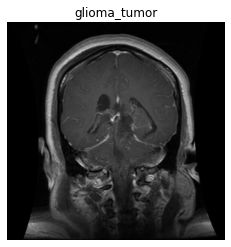

In [8]:
for img_batch,l_batch in data.take(1):
  print(img_batch.shape)
  print(l_batch.numpy())
  plt.imshow(img_batch[7].numpy().astype('uint8'))
  plt.title(classes[l_batch[7]])
  plt.axis('off')


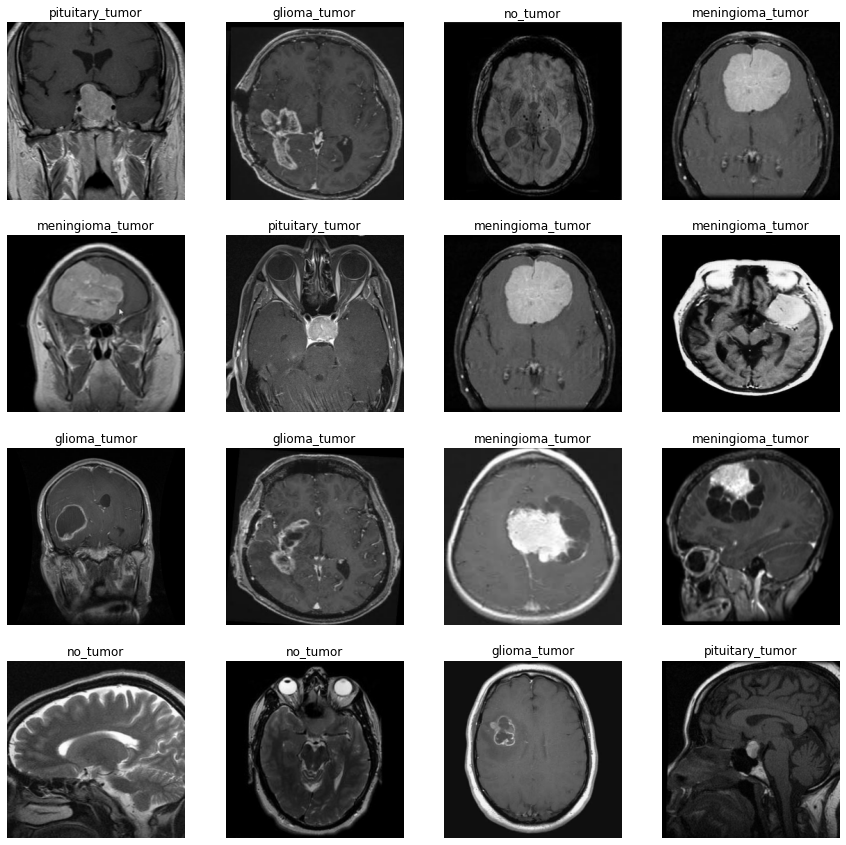

In [9]:
plt.figure(figsize=(15,15))
for img_batch,l_batch in test.take(1):
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(img_batch[i].numpy().astype('uint8'))
    plt.title(classes[l_batch[i]])
    plt.axis('off')

In [10]:
def data_preprocess(ds,train_split=0.8,shuffle=True,shuffle_size=10000000):
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size=int(ds_size*train_split)


  train=ds.take(train_size)
  val_ds=ds.skip(train_size)

  return train,val_ds

In [11]:
train,val_ds=data_preprocess(data)

In [12]:
len(train),len(test),len(val_ds)

(72, 13, 18)

In [13]:
train=train.shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.shuffle(20000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
from keras import layers,models

In [15]:
resize_rescale=keras.Sequential([
                                 keras.layers.experimental.preprocessing.Resizing(256,256),
                                 keras.layers.experimental.preprocessing.Rescaling(1/255),
                                 keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                 keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [16]:
input_shape=(2,256,256,3)
model=models.Sequential([
                         resize_rescale,
                         layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Flatten(),
                         layers.Dense(64,activation='relu'),
                         layers.Dense(4,activation='softmax')

])
model.build(
    input_shape=input_shape
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (2, 256, 256, 3)          0         
_________________________________________________________________
conv2d (Conv2D)              (2, 254, 254, 32)         896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (2, 127, 127, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (2, 125, 125, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (2, 62, 62, 64)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (2, 60, 60, 64)           36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (2, 30, 30, 64)          

In [17]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history=model.fit(
    train,
    batch_size=2,
    validation_data=val_ds,
    verbose=1,
    epochs=50
)

Epoch 1/50
72/72 [==============================] - 366s 259ms/step - loss: 1.2340 - accuracy: 0.4154 - val_loss: 1.2303 - val_accuracy: 0.4479
Epoch 2/50
72/72 [==============================] - 28s 265ms/step - loss: 1.0786 - accuracy: 0.5288 - val_loss: 1.1318 - val_accuracy: 0.4948
Epoch 3/50
72/72 [==============================] - 27s 250ms/step - loss: 0.9601 - accuracy: 0.5920 - val_loss: 0.9451 - val_accuracy: 0.6146
Epoch 4/50
72/72 [==============================] - 27s 252ms/step - loss: 0.9073 - accuracy: 0.6081 - val_loss: 0.8807 - val_accuracy: 0.6163
Epoch 5/50
72/72 [==============================] - 27s 251ms/step - loss: 0.8379 - accuracy: 0.6360 - val_loss: 0.7655 - val_accuracy: 0.7066
Epoch 6/50
72/72 [==============================] - 26s 249ms/step - loss: 0.7863 - accuracy: 0.6796 - val_loss: 0.6939 - val_accuracy: 0.7031
Epoch 7/50
72/72 [==============================] - 26s 249ms/step - loss: 0.7456 - accuracy: 0.6805 - val_loss: 0.7039 - val_accuracy: 0.697

In [19]:
model.evaluate(test)

13/13 [==============================] - 13s 62ms/step - loss: 2.1367 - accuracy: 0.7056


[2.1367204189300537, 0.7055837512016296]

In [20]:
history

In [21]:
history.params

{'epochs': 50, 'steps': 72, 'verbose': 1}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
acc=history.history['accuracy']
loss=history.history['loss']
v_acc=history.history['val_accuracy']
v_loss=history.history['val_loss']

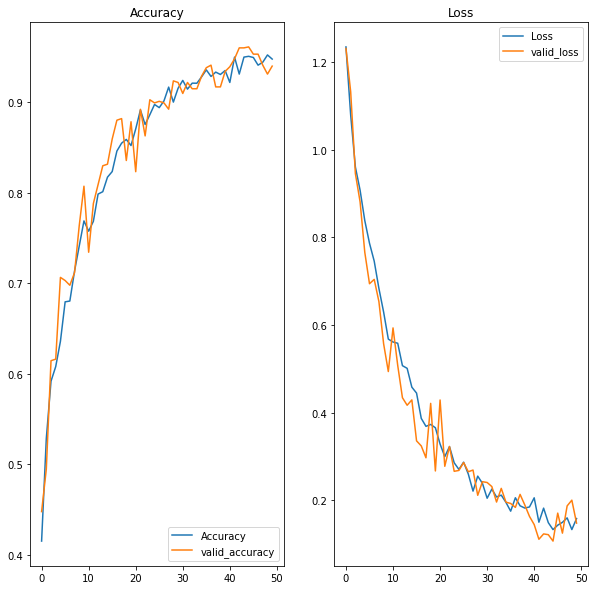

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label='Accuracy')
plt.plot(range(50),v_acc, label='valid_accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(range(50),loss,label='Loss')
plt.plot(range(50),v_loss, label='valid_loss')
plt.legend(loc='best')
plt.title('Loss')
plt.show()

In [29]:
def predict(model,img):
  img_array=keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  prediction=model.predict(img_array)

  predict_class=classes[np.argmax(prediction[0])]
  confidence=round(100*(np.max(prediction[0])),2)
  return predict_class,confidence

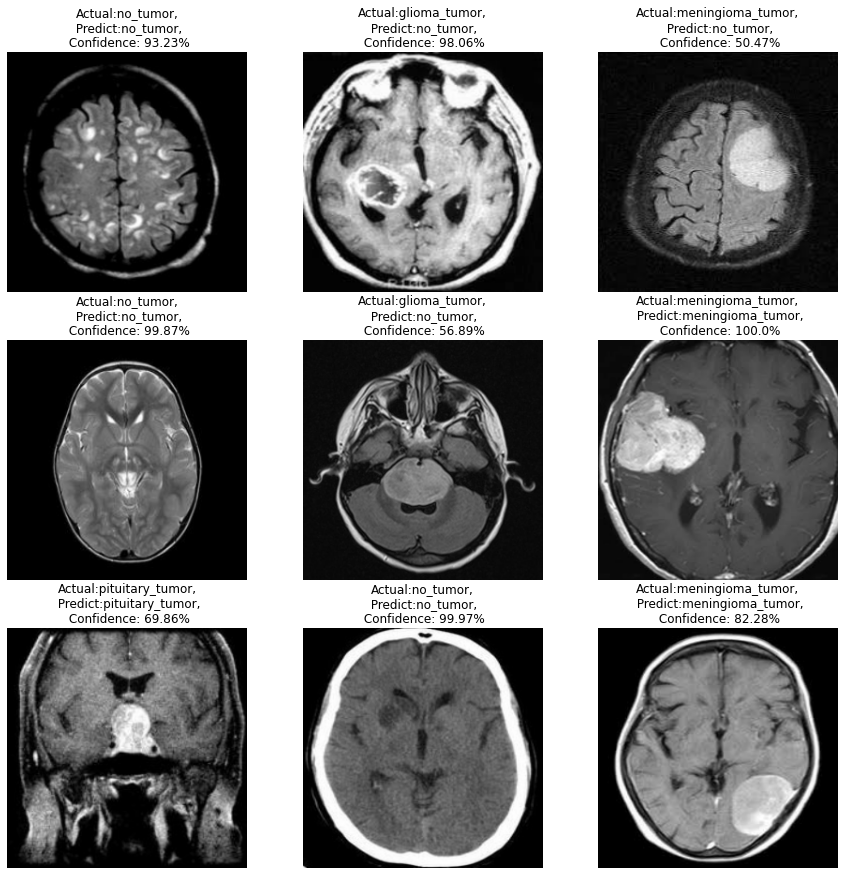

In [30]:
plt.figure(figsize=(15,15))
for images,label in test.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predict_class,confidence=predict(model,images[i].numpy())
    actual_class=classes[label[i]]
    plt.title(f'Actual:{actual_class},\n Predict:{predict_class},\n Confidence: {confidence}%')
    plt.axis('off')

In [31]:
mv=1
model.save(f'/content/drive/MyDrive/Colab Notebooks/A3==project/model/{mv}')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/A3==project/model/1/assets


In [34]:
mv=max([int(i) for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/A3==project/model')])+1
model.save(f'/content/drive/MyDrive/Colab Notebooks/A3==project/model/{mv}')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/A3==project/model/3/assets
